In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib as mpl
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config Completer.use_jedi = False
%config InlineBackend.figure_format = 'retina'

In [4]:
water = pd.read_csv('C:\\k_digital\\source\\mygit\\ML-First-Project\\water_preprocessing.csv')

In [113]:
water_test = pd.read_csv('C:\\k_digital\\source\\mygit\\ML-First-Project\\data_ts_city.csv')

In [114]:
water_test['target'] = water_test['구미 혁신도시배수지 유출유량 적산차']
water_test = water_test.drop('구미 혁신도시배수지 유출유량 적산차', axis=1)

In [115]:
water_test

,datetime,target
0,2021-01-01 00:00:00,106.0
1,2021-01-01 01:00:00,184.0
2,2021-01-01 02:00:00,277.0
3,2021-01-01 03:00:00,197.0
4,2021-01-01 04:00:00,72.0
...,...,...
8419,2021-12-17 19:00:00,327.0
8420,2021-12-17 20:00:00,513.0
8421,2021-12-17 21:00:00,396.0
8422,2021-12-17 22:00:00,350.0


In [5]:
water

,datetime,target
0,2017-01-01 01:00,138.0
1,2017-01-01 02:00,237.0
2,2017-01-01 03:00,128.0
3,2017-01-01 04:00,14.0
4,2017-01-01 05:00,11.0
...,...,...
35058,2020-12-31 19:00,328.0
35059,2020-12-31 20:00,347.0
35060,2020-12-31 21:00,335.0
35061,2020-12-31 22:00,141.0


In [6]:
water['datetime'] = water['datetime'].astype('datetime64[ns]')

In [116]:
water_test['datetime'] = water_test['datetime'].astype('datetime64[ns]')

In [118]:
water_test = water_test.set_index('datetime')

In [7]:
water = water.set_index('datetime')
water

,target
datetime,
2017-01-01 01:00:00,138.0
2017-01-01 02:00:00,237.0
2017-01-01 03:00:00,128.0
2017-01-01 04:00:00,14.0
2017-01-01 05:00:00,11.0
...,...
2020-12-31 19:00:00,328.0
2020-12-31 20:00:00,347.0
2020-12-31 21:00:00,335.0


In [121]:
water_test.index = water_test.index.to_period('h')

In [106]:
water.index = water.index.to_period('h')

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [129]:
water.sort_values(by='target', ascending=False).head()

,target
2019-12-23 15:00,1274.0
2019-12-23 16:00,1154.0
2020-05-31 12:00,962.0
2020-09-03 22:00,942.0
2019-09-25 10:00,910.0


In [128]:
water_test.sort_values(by='target', ascending=False).head()

,target
datetime,
2021-03-04 14:00,1350.0
2021-10-19 10:00,1007.0
2021-01-30 21:00,1000.0
2021-10-06 18:00,972.0
2021-10-18 10:00,945.0


In [126]:
water_test.target = water_test.target.round(0)

In [127]:
water.target = water.target.round(0)

In [131]:
water.plot()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [130]:
water_test.plot()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [132]:
# 시각화
water[(water.index.year == 2017) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2018) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2019) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2020) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [133]:
water.target.isna().sum()

0

# SKTIME 설치

In [43]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

In [1]:
# 넘파이 버전 낮추기
!pip install numpy==1.20.3

In [12]:
print(np.__version__)

1.20.3


In [15]:
## conda prompt 에 설치
## conda install -c conda-forge sktime

In [44]:
## python -m pip install --user scikit-image (--user 형식 활용)

In [13]:
import  scipy.signal.signaltools
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [67]:
from sktime.forecasting.base import ForecastingHorizon

In [27]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [ ]:
# # step 1: data specification
# y = water

# # step 2: specifying forecasting horizon
# fh = np.arange(1, 37)

# # step 3: specifying the forecasting algorithm
# forecaster = NaiveForecaster(strategy="last", sp=12)

# # step 4: fitting the forecaster
# forecaster.fit(y)

# # step 5: querying predictions
# y_pred = forecaster.predict(fh)

In [56]:
from sktime.utils.datetime import _coerce_duration_to_int
from sktime.utils.validation import (
    array_is_int,
    array_is_timedelta_or_date_offset,
    is_array,
    is_int,
    is_timedelta_or_date_offset,
)
from sktime.utils.validation.series import (
    VALID_INDEX_TYPES,
    is_in_valid_absolute_index_types,
    is_in_valid_index_types,
    is_in_valid_relative_index_types,
    is_integer_index,
)

In [ ]:
from sktime.forecasting.all import *

y = water[(water.index.year == 2020)]
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=24)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

In [60]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [61]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

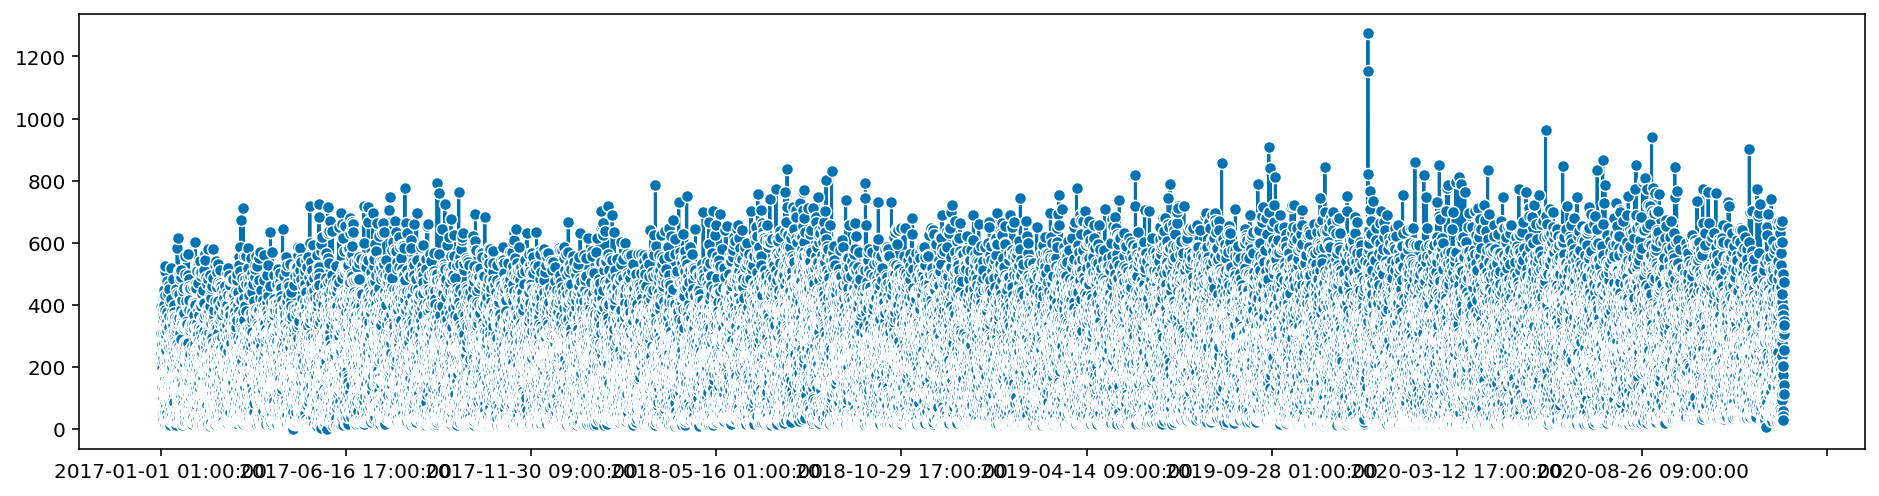

In [62]:
# plotting for visualization
plot_series(water)

In [ ]:
from sktime.forecasting.all import *

y = water[(water.index.year == 2020)]
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=24)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

## SKTIME 예측

In [63]:
from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster

In [ ]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)
forecaster.fit(water)
pred = forecaster.predict(fh)

In [151]:
water_test.head()

,target
datetime,
2021-01-01 00:00,106.0
2021-01-01 01:00,184.0
2021-01-01 02:00,277.0
2021-01-01 03:00,197.0
2021-01-01 04:00,72.0


In [152]:
pred.head()

,target
2021-01-01 00:00,134.657566
2021-01-01 01:00,112.566301
2021-01-01 02:00,93.380722
2021-01-01 03:00,73.890583
2021-01-01 04:00,62.084675


In [164]:
pred.to_excel('pred_test.xlsx')

## 평가

In [154]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

162.85145801467252

In [155]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

162.85145801467252

In [153]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(water_test, pred, symmetric=False)

60921433208832.11

In [156]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster24 = ThetaForecaster(sp=24)
forecaster24.fit(water)
pred = forecaster24.predict(fh)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [157]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

94.15255199169064

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

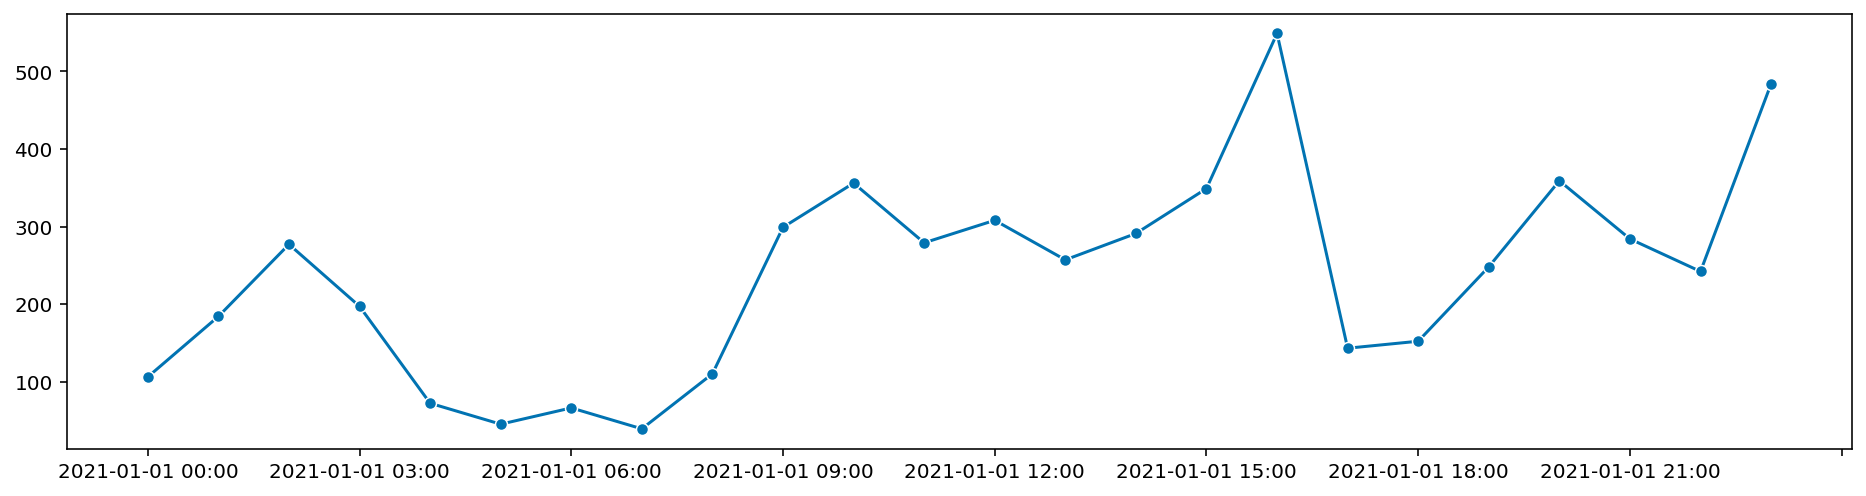

In [167]:
plot_series(water_test.head(24))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

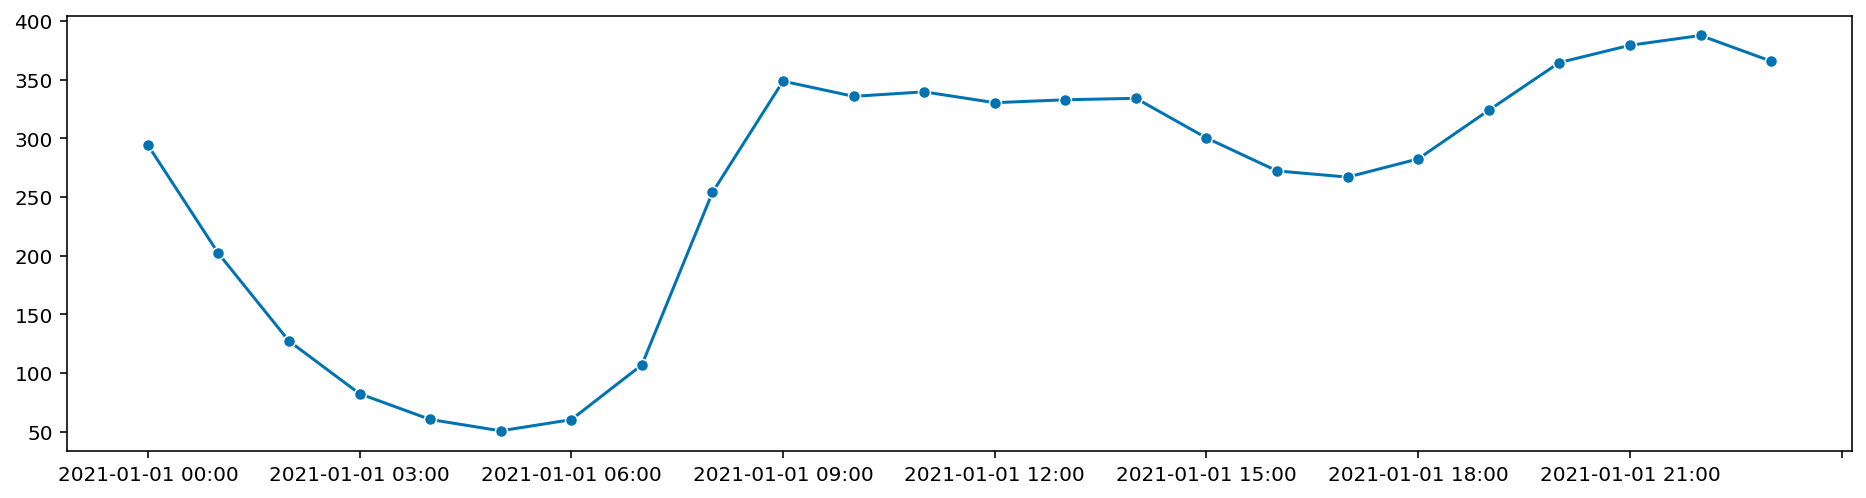

In [168]:
plot_series(pred.head(24))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

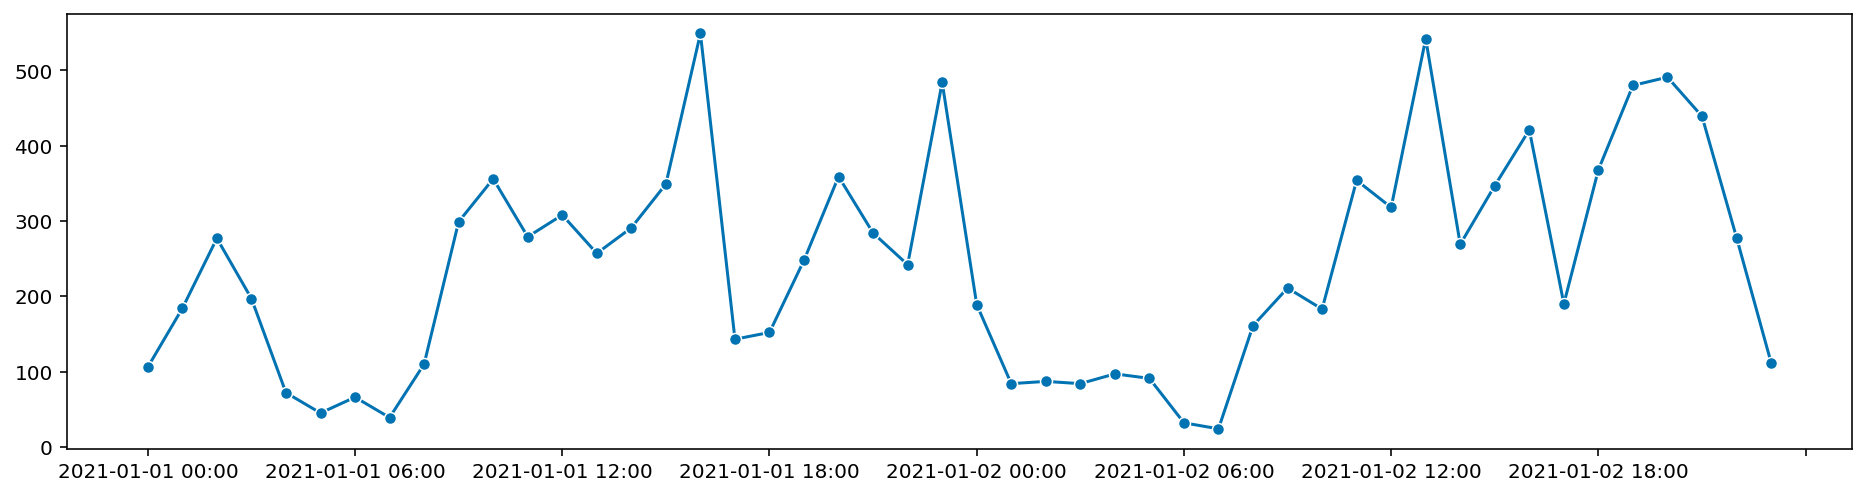

In [169]:
plot_series(water_test.head(48))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

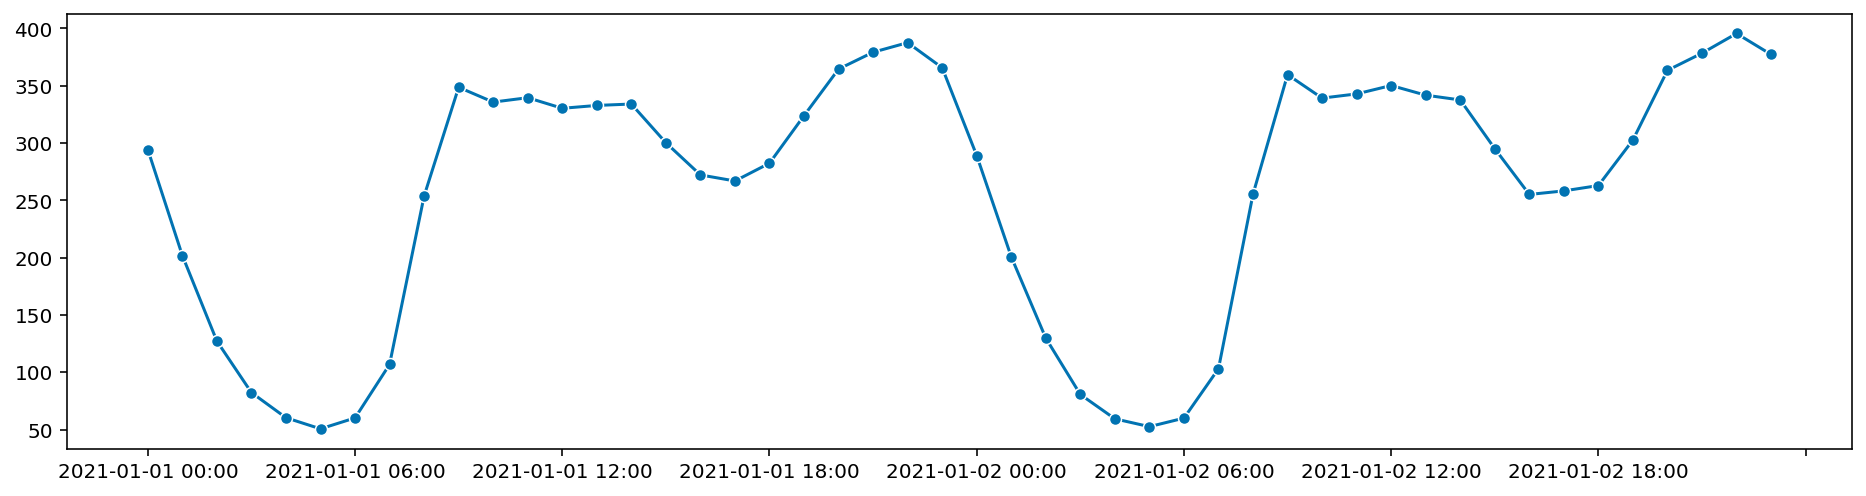

In [170]:
plot_series(pred.head(48))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

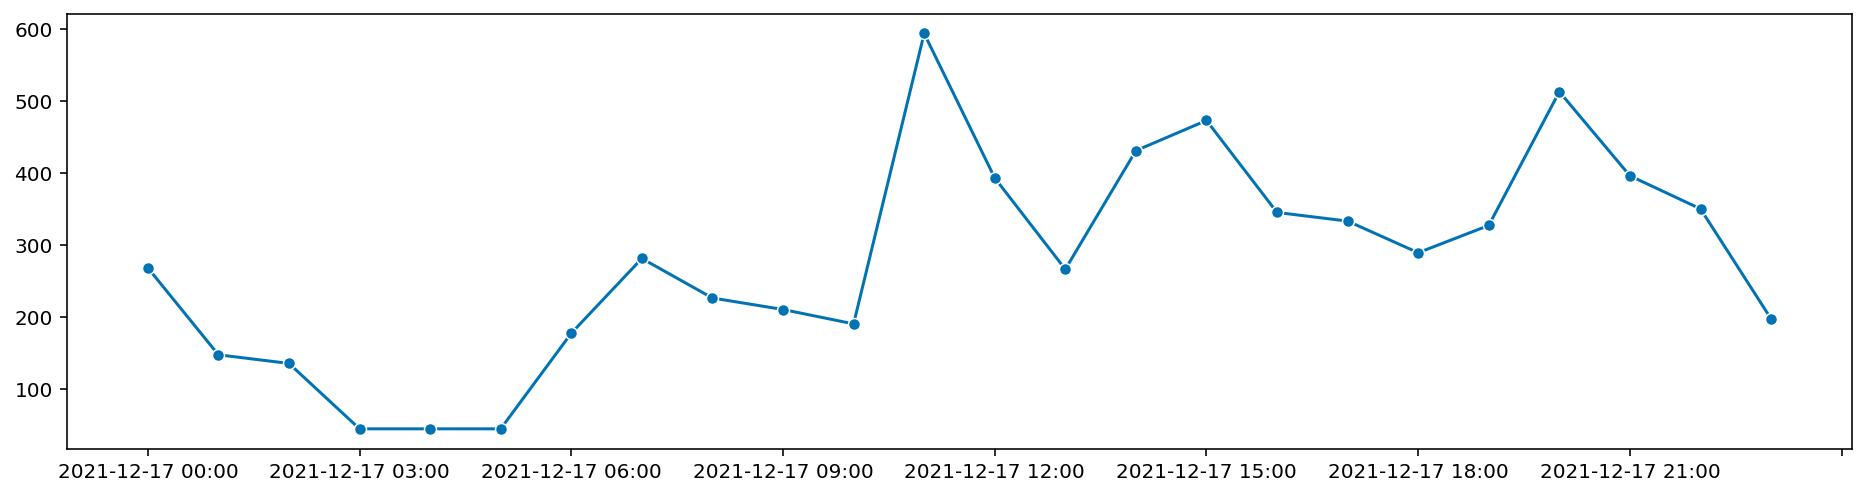

In [173]:
plot_series(water_test.tail(24))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

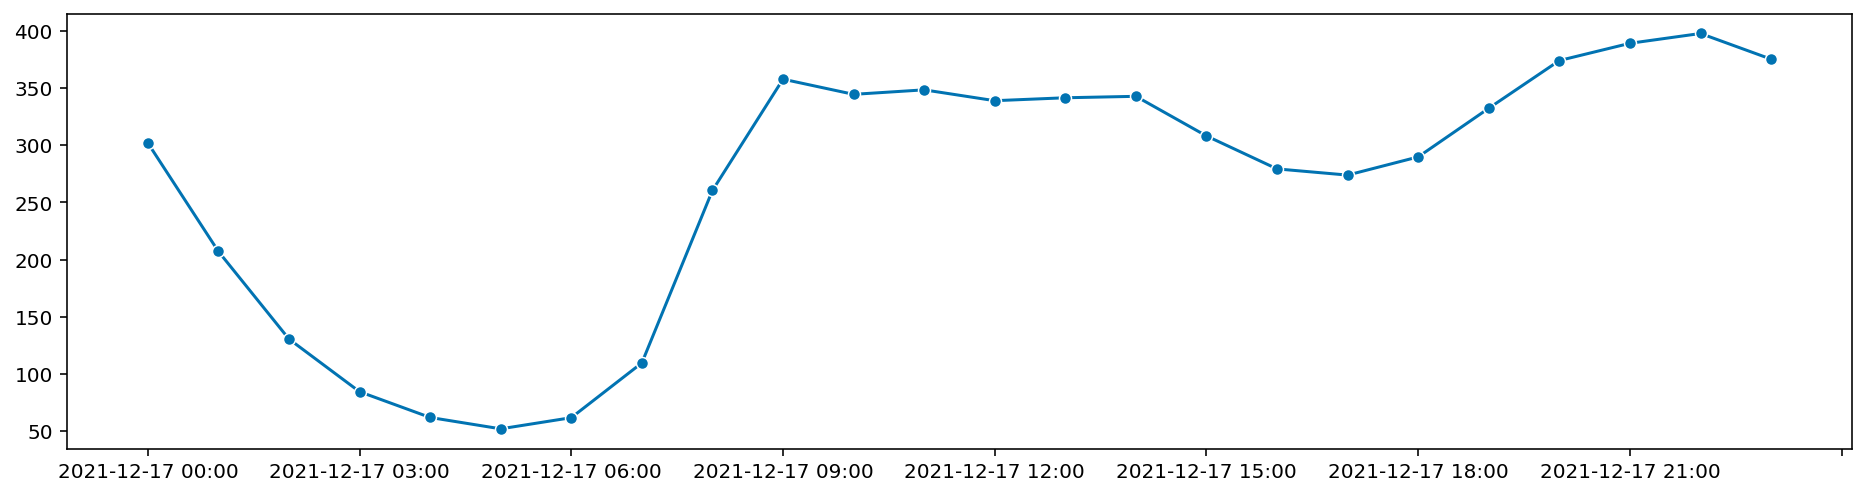

In [174]:
plot_series(pred.tail(24))

In [158]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster48 = ThetaForecaster(sp=48)
forecaster48.fit(water)
pred = forecaster48.predict(fh)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [159]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

94.04467519098299

In [160]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster_n = ThetaForecaster(sp=None)
forecaster_n.fit(water)
pred = forecaster_n.predict(fh)

TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

In [50]:
y = water[(water.index.year == 2020)]

In [51]:
fh = ForecastingHorizon(y.index, is_relative=False)

In [53]:
forecaster = NaiveForecaster(strategy="last", sp=24)

In [54]:
forecaster.fit(y)

NaiveForecaster(sp=24)

In [ ]:
# 평가 1 / 낮을수록 좋음

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
# 평가 2

from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
mape = MeanAbsolutePercentageError(symmetric=False)
mape.get_tag("lower_is_better")
mape(y_test, y_pred)

In [ ]:
y_pred

In [ ]:
b = y_pred[(y_pred.index.year == 2020) & (y_pred.index.month == 10) &(y_pred.index.day == 2)&(y_pred.index.hour >= 0)]

In [ ]:
plot_series(b)

In [ ]:
a = water[(water.index.year == 2020) & (water.index.month == 10) &(water.index.day == 2)&(water.index.hour >= 0)]

In [ ]:
figure = (2,1,2)
plot_series(a)
plot_series(b)

In [ ]:
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

In [ ]:
from sktime.performance_metrics.forecasting import smape_loss

In [ ]:
smape_loss(y_test, y_pred)

In [ ]:
y.index[-1]